In [40]:
#TASK 1 = Import the Dataset in python Its Called World Ranking Universities.
import pandas as pd
df=pd.read_excel("G:\\CoachX\\Python\\Project Mega\\WorldUniversity.xlsx")
print(df)



      world_rank                            institution         country  \
0              1                     Harvard University             USA   
1              2  Massachusetts Institute of Technology             USA   
2              3                    Stanford University             USA   
3              4                University of Cambridge  United Kingdom   
4              5     California Institute of Technology             USA   
...          ...                                    ...             ...   
2195         996              University of the Algarve        Portugal   
2196         997                  Alexandria University           Egypt   
2197         998           Federal University of CearÃ¡          Brazil   
2198         999                University of A CoruÃ±a           Spain   
2199        1000        China Pharmaceutical University           China   

      national_rank  quality_of_education  alumni_employment  \
0                 1                

In [2]:
#TASK 2 Data Cleaning

# 1) Find the Missing values 
missing_values = df.isnull().sum()
# print("Missing Values= ")
print(missing_values[missing_values > 0])



broad_impact    200
dtype: int64


In [3]:
# 2) Remove the duplicates from the datasets
# Find duplicate rows based on all columns
duplicate_rows = df[df.duplicated()]

# Display duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
Empty DataFrame
Columns: [world_rank, institution, country, national_rank, quality_of_education, alumni_employment, quality_of_faculty, publications, influence, citations, broad_impact, patents, score, year]
Index: []


In [4]:
# 3) Remove the inconsistencies from the datasets
# Loop through each column and apply cleaning steps
for column in df.columns:
    if column == 'world_rank':
        # Remove rows with negative values in the 'world_rank' column
        df = df[df['world_rank'] >= 0]
    elif column == 'institution':
        # Standardize 'institution' names to uppercase
        df['institution'] = df['institution'].str.upper()
    elif column == 'country':
        # Standardize country names to uppercase
        df['country'] = df['country'].str.upper()
    elif column == 'national_rank':
        # Remove rows with negative values in the 'national_rank' column
        df = df[df['national_rank'] >= 0]
    elif column == 'quality_of_education':
        # Remove rows with negative values in the 'quality_of_education' column
        df = df[df['quality_of_education'] >= 0]
    elif column == 'alumni_employment':
        # Convert string representations of numbers to numeric types in the 'alumni_employment' column
        df['alumni_employment'] = pd.to_numeric(df['alumni_employment'], errors='coerce')
    elif column == 'quality_of_faculty':
        # Remove rows with negative values in the 'quality_of_faculty' column
        df = df[df['quality_of_faculty'] >= 0]
    elif column == 'publications':
        # Remove rows with negative values in the 'publications' column
        df = df[df['publications'] >= 0]
    elif column == 'influence':
        # Remove rows with negative values in the 'influence' column
        df = df[df['influence'] >= 0]
    elif column == 'citations':
        # Remove rows with negative values in the 'citations' column
        df = df[df['citations'] >= 0]
    elif column == 'patents':
        # Remove rows with negative values in the 'patents' column
        df = df[df['patents'] >= 0]
    elif column == 'score':
        # Remove rows with negative values in the 'score' column
        df = df[df['score'] >= 0]
    
        
        
        
        
        
# Display the cleaned dataset
print("Cleaned Dataset after handling inconsistencies:")
print(df.head())


Cleaned Dataset after handling inconsistencies:
   world_rank                            institution         country  \
0           1                     HARVARD UNIVERSITY             USA   
1           2  MASSACHUSETTS INSTITUTE OF TECHNOLOGY             USA   
2           3                    STANFORD UNIVERSITY             USA   
3           4                UNIVERSITY OF CAMBRIDGE  UNITED KINGDOM   
4           5     CALIFORNIA INSTITUTE OF TECHNOLOGY             USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0              1                     7                  9                   1   
1              2                     9                 17                   3   
2              3                    17                 11                   5   
3              1                    10                 24                   4   
4              4                     2                 29                   7   

   publications  influence  cita

In [5]:
# TASK 3 = Make Connection wit SQL Server

# Import Necessary Libraries
import pyodbc as odbc 
import numpy as np # linear algebra
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import sqlalchemy as sa
print("done")

done


In [6]:
# Make a Connection String with python
Connection_string = (

        r'DRIVER={ODBC Driver 17 for SQL Server};'
        r'SERVER= DESKTOP-D0U5H38\SQLEXPRESS;'
        r'DATABASE=Mega_Project;'
        r'Trusted_Connection=yes;'
        

)
Conn = odbc.connect(Connection_string)
print(Conn)
print("Connection successful!")

Connection successful!


In [7]:
# Connect with MS-SQL Server

from sqlalchemy.engine import URL
connection_url = URL.create("mssql+pyodbc", query={"odbc_connect": Connection_string})

from sqlalchemy import create_engine
engine = create_engine(connection_url)
print("Connection successful!")

Connection successful!


In [8]:
# Start with SQL Database
import sqlalchemy as sa

with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT TOP 10  * FROM WorldUniversity"), conn)
    print(df)


   world_rank                     institution         country  national_rank  \
0       673.0            University of Girona           Spain           21.0   
1       674.0                Keele University  United Kingdom           49.0   
2       675.0          University of Poitiers          France           30.0   
3       676.0          University of Insubria           Italy           36.0   
4       677.0  Wuhan University of Technology           China           38.0   
5       678.0          University of Pretoria    South Africa            5.0   
6       679.0        Banaras Hindu University           India           10.0   
7       680.0          University of L'Aquila           Italy           37.0   
8       681.0          University of Alicante           Spain           22.0   
9       682.0   American University of Beirut         Lebanon            1.0   

   quality_of_education  alumni_employment  quality_of_faculty  publications  \
0                 367.0              56

In [9]:
# Task 4 :-
# Questions using SQL: 
# 1)Retrieve all columns for universities in the USA.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT * FROM WorldUniversity WHERE country = 'USA';"), conn)
    print(df)


     world_rank                                    institution country  \
0         687.0                University of Nevada, Las Vegas     USA   
1         710.0              Rochester Institute of Technology     USA   
2         712.0                 San Francisco State University     USA   
3         717.0                           Marquette University     USA   
4         718.0  Missouri University of Science and Technology     USA   
..          ...                                            ...     ...   
568       655.0                            University of Idaho     USA   
569       656.0                        Old Dominion University     USA   
570       661.0                      Portland State University     USA   
571       665.0                          Loma Linda University     USA   
572       668.0                     University of Maine, Orono     USA   

     national_rank  quality_of_education  alumni_employment  \
0            195.0                 367.0        

In [10]:
#2) Find the top 10 universities with the highest scores in 2012.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT TOP 10 * FROM WorldUniversity WHERE year = 2012 ORDER BY score DESC; "), conn)
    print(df)


   world_rank                            institution         country  \
0         1.0                     Harvard University             USA   
1         2.0  Massachusetts Institute of Technology             USA   
2         3.0                    Stanford University             USA   
3         4.0                University of Cambridge  United Kingdom   
4         5.0     California Institute of Technology             USA   
5         6.0                   Princeton University             USA   
6         7.0                   University of Oxford  United Kingdom   
7         8.0                        Yale University             USA   
8         9.0                    Columbia University             USA   
9        10.0     University of California, Berkeley             USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0            1.0                   7.0                9.0                 1.0   
1            2.0                   9.0       

In [11]:
#3) List universities in the United Kingdom with a score above 80 in 2013.

with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT * FROM WorldUniversity WHERE country = 'United Kingdom' AND score > 80 AND year = 2013; "), conn)
    print(df)


   world_rank              institution         country  national_rank  \
0         3.0     University of Oxford  United Kingdom            1.0   
1         5.0  University of Cambridge  United Kingdom            2.0   

   quality_of_education  alumni_employment  quality_of_faculty  publications  \
0                   7.0               12.0                10.0          11.0   
1                   3.0               15.0                 5.0           9.0   

   influence  citations broad_impact  patents  score    year  
0        7.0       13.0         None     15.0  92.54  2013.0  
1       11.0       10.0         None     39.0  90.24  2013.0  


In [12]:
# 4) Count the number of universities in each country.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT country, COUNT(*) AS university_count FROM WorldUniversity GROUP BY country;  "), conn)
    print(df)


                 country  university_count
0            Puerto Rico                 2
1                Finland                20
2            South Korea                72
3                    USA               573
4            New Zealand                12
5                 Uganda                 2
6                  Egypt                 8
7                  Italy                96
8                 Brazil                36
9            Netherlands                29
10             Hong Kong                12
11              Malaysia                 6
12               Germany               115
13             Lithuania                 2
14               Iceland                 2
15               Hungary                12
16                Cyprus                 2
17           Switzerland                26
18               Estonia                 2
19       Slovak Republic                 2
20               Lebanon                 2
21          Saudi Arabia                 8
22         

In [13]:
#5) Calculate the average score for universities in each country in 2014.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT country, AVG(score) AS average_score FROM WorldUniversity WHERE year = 2014 GROUP BY country; "), conn)
    print(df)


                 country  average_score
0              Argentina      44.732500
1              Australia      46.050741
2                Austria      45.291667
3                Belgium      47.256000
4                 Brazil      44.929444
5               Bulgaria      44.480000
6                 Canada      47.287500
7                  Chile      44.862500
8                  China      45.109286
9               Colombia      44.620000
10               Croatia      44.920000
11                Cyprus      44.320000
12        Czech Republic      44.842000
13               Denmark      48.350000
14                 Egypt      44.365000
15               Estonia      44.940000
16               Finland      45.862222
17                France      46.332600
18               Germany      46.654909
19                Greece      44.984286
20             Hong Kong      46.556667
21               Hungary      44.795000
22               Iceland      45.050000
23                 India      44.888667


In [14]:
#6)Find universities with a quality_of_education score greater than 20.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT * FROM WorldUniversity WHERE quality_of_education > 20; "), conn)
    print(df)


      world_rank                     institution         country  \
0          673.0            University of Girona           Spain   
1          674.0                Keele University  United Kingdom   
2          675.0          University of Poitiers          France   
3          676.0          University of Insubria           Italy   
4          677.0  Wuhan University of Technology           China   
...          ...                             ...             ...   
2121       668.0      University of Maine, Orono             USA   
2122       669.0   Graz University of Technology         Austria   
2123       670.0                 Gifu University           Japan   
2124       671.0       University of JyvÃ¤skylÃ¤         Finland   
2125       672.0          University of Paris 13          France   

      national_rank  quality_of_education  alumni_employment  \
0              21.0                 367.0              567.0   
1              49.0                 367.0              

In [15]:
#7)Retrieve universities with a score between 70 and 80.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT * FROM WorldUniversity WHERE score BETWEEN 70 AND 80; "), conn)
    print(df)


    world_rank                                      institution      country  \
0          8.0                                  Yale University          USA   
1          9.0                              Columbia University          USA   
2         10.0               University of California, Berkeley          USA   
3         11.0                            University of Chicago          USA   
4         12.0                               Cornell University          USA   
5         13.0                       University of Pennsylvania          USA   
6          9.0                            University of Chicago          USA   
7         10.0                                  Yale University          USA   
8         11.0               California Institute of Technology          USA   
9         12.0                       University of Pennsylvania          USA   
10        13.0                               Cornell University          USA   
11        14.0                          

In [16]:
#8)List the top 5 universities with the highest alumni employment scores in 2012.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT TOP 5 * FROM WorldUniversity WHERE year = 2012 ORDER BY alumni_employment DESC;"), conn)
    print(df)


   world_rank                                   institution country  \
0        18.0                 Weizmann Institute of Science  Israel   
1        20.0           University of California, San Diego     USA   
2        21.0                        Rockefeller University     USA   
3        24.0       University of California, San Francisco     USA   
4        26.0  University of Illinois at Urbanaâ€“Champaign     USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0            1.0                   4.0              101.0                22.0   
1           14.0                  61.0              101.0                15.0   
2           15.0                   1.0              101.0                16.0   
3           17.0                 101.0              101.0                21.0   
4           19.0                  82.0              101.0                18.0   

   publications  influence  citations broad_impact  patents  score    year  
0        

In [17]:
#9)Find the university with the highest quality_of_faculty in 2013.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT TOP 1 * FROM WorldUniversity WHERE year = 2013 ORDER BY quality_of_faculty DESC; "), conn)
    print(df)


   world_rank              institution country  national_rank  \
0        28.0  Northwestern University     USA           21.0   

   quality_of_education  alumni_employment  quality_of_faculty  publications  \
0                 101.0               21.0               101.0          27.0   

   influence  citations broad_impact  patents  score    year  
0       26.0       24.0         None     30.0  56.12  2013.0  


In [18]:
#10)Count the number of universities that have a national_rank less than 5.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT COUNT(*) AS university_count FROM WorldUniversity WHERE national_rank < 5; "), conn)
    print(df)


   university_count
0               448


In [19]:
#11)Retrieve universities with a quality_of_education rank equal to 1.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT * FROM WorldUniversity WHERE quality_of_education = 1; "), conn)
    print(df)


   world_rank             institution country  national_rank  \
0        21.0  Rockefeller University     USA           15.0   
1         1.0      Harvard University     USA            1.0   
2         1.0      Harvard University     USA            1.0   
3         1.0      Harvard University     USA            1.0   

   quality_of_education  alumni_employment  quality_of_faculty  publications  \
0                   1.0              101.0                16.0         101.0   
1                   1.0                1.0                 1.0           1.0   
2                   1.0                1.0                 1.0           1.0   
3                   1.0                1.0                 1.0           1.0   

   influence  citations broad_impact  patents   score    year  
0       28.0       96.0         None    101.0   61.74  2012.0  
1        1.0        1.0         None      7.0  100.00  2013.0  
2        1.0        1.0         None      2.0  100.00  2014.0  
3        1.0        1.

In [20]:
#12) List the top 10 universities with the highest citations in 2014.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT TOP 10 * FROM WorldUniversity WHERE year = 2014 ORDER BY citations DESC; "), conn)
    print(df)


   world_rank                           institution         country  \
0       246.0        National Cheng Kung University          Taiwan   
1       299.0                    Leipzig University         Germany   
2       328.0  Indian Institute of Technology Delhi           India   
3       347.0                 University of Navarra           Spain   
4       394.0                    Tianjin University           China   
5       397.0                  Cranfield University  United Kingdom   
6       399.0             Xi'an Jiaotong University           China   
7       406.0           Chonbuk National University     South Korea   
8       420.0                  King Saud University    Saudi Arabia   
9       428.0                     Sogang University     South Korea   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0            2.0                 355.0               60.0               210.0   
1           25.0                 308.0              478.

In [21]:
#13)Calculate the average influence score for universities in the USA.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT AVG(influence) AS average_influence FROM WorldUniversity WHERE country = 'USA'; "), conn)
    print(df)


   average_influence
0          280.13438


In [22]:
#14) Find universities with a broad_impact rank less than or equal to 50.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT * FROM WorldUniversity WHERE broad_impact <= 50; "), conn)
    print(df)


Empty DataFrame
Columns: [world_rank, institution, country, national_rank, quality_of_education, alumni_employment, quality_of_faculty, publications, influence, citations, broad_impact, patents, score, year]
Index: []


In [23]:
#15)Retrieve universities in Japan with a score greater than 60 in 2012.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT * FROM WorldUniversity WHERE country = 'Japan' AND score > 60 AND year = 2012; "), conn)
    print(df)


   world_rank          institution country  national_rank  \
0        14.0  University of Tokyo   Japan            1.0   
1        17.0     Kyoto University   Japan            2.0   

   quality_of_education  alumni_employment  quality_of_faculty  publications  \
0                  32.0               19.0                31.0           8.0   
1                  42.0               38.0                19.0          25.0   

   influence  citations broad_impact  patents  score    year  
0       19.0       23.0         None      3.0  69.49  2012.0  
1       36.0       43.0         None     23.0  65.76  2012.0  


In [24]:
#16)List the top 5 universities with the highest patents in 2013.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT TOP 5 * FROM WorldUniversity WHERE year = 2013 ORDER BY patents DESC; "), conn)
    print(df)


   world_rank                              institution country  national_rank  \
0         8.0                     Princeton University     USA            6.0   
1         9.0                    University of Chicago     USA            7.0   
2        29.0                    University of Toronto  Canada            1.0   
3        36.0                  University of Paris-Sud  France            1.0   
4        37.0  University of California, Santa Barbara     USA           25.0   

   quality_of_education  alumni_employment  quality_of_faculty  publications  \
0                   4.0               14.0                 3.0          58.0   
1                   9.0               19.0                 8.0          37.0   
2                  91.0               81.0                34.0           2.0   
3                  26.0              101.0                26.0          73.0   
4                 101.0              101.0                28.0          89.0   

   influence  citations broad_im

In [25]:
#17)Count the number of universities with a quality_of_faculty score between 5 and 10.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT COUNT(*) AS university_count FROM WorldUniversity WHERE quality_of_faculty BETWEEN 5 AND 10; "), conn)
    print(df)

   university_count
0                24


In [26]:
#18)Calculate the average score for universities in the United Kingdom in 2014.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT AVG(score) AS average_score FROM WorldUniversity WHERE country = 'United Kingdom' AND year = 2014;"), conn)
    print(df)

   average_score
0      48.445937


In [27]:
#19)Find universities with a national_rank between 1 and 3 in 2012.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT * FROM WorldUniversity WHERE national_rank BETWEEN 1 AND 3 AND year = 2012;"), conn)
    print(df)

    world_rank                                        institution  \
0          1.0                                 Harvard University   
1          2.0              Massachusetts Institute of Technology   
2          3.0                                Stanford University   
3          4.0                            University of Cambridge   
4          7.0                               University of Oxford   
5         14.0                                University of Tokyo   
6         16.0    Swiss Federal Institute of Technology in Zurich   
7         17.0                                   Kyoto University   
8         18.0                      Weizmann Institute of Science   
9         22.0                     Hebrew University of Jerusalem   
10        28.0                            Imperial College London   
11        32.0                                   Osaka University   
12        35.0                              University of Toronto   
13        41.0                    

In [29]:
#20)List universities with a citations rank less than 10.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT * FROM WorldUniversity WHERE citations < 10; "), conn)
    print(df)

    world_rank                            institution         country  \
0          1.0                     Harvard University             USA   
1          2.0  Massachusetts Institute of Technology             USA   
2          3.0                    Stanford University             USA   
3         10.0     University of California, Berkeley             USA   
4         13.0             University of Pennsylvania             USA   
5         15.0               Johns Hopkins University             USA   
6         19.0  University of California, Los Angeles             USA   
7         34.0      University of Michigan, Ann Arbor             USA   
8         39.0     University of Washington - Seattle             USA   
9          1.0                     Harvard University             USA   
10         2.0                    Stanford University             USA   
11         4.0  Massachusetts Institute of Technology             USA   
12         7.0     University of California, Berkel

In [28]:
#21)Retrieve the university with the highest alumni_employment in 2013.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT TOP 1 * FROM WorldUniversity WHERE year = 2013 ORDER BY alumni_employment DESC;"), conn)
    print(df)

   world_rank                         institution country  national_rank  \
0        11.0  California Institute of Technology     USA            9.0   

   quality_of_education  alumni_employment  quality_of_faculty  publications  \
0                   5.0              101.0                 7.0          38.0   

   influence  citations broad_impact  patents  score    year  
0       24.0       25.0         None     17.0  77.59  2013.0  


In [30]:
#22)Find the top 5 universities with the highest publications in 2012.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT TOP 5 * FROM WorldUniversity WHERE year = 2012 ORDER BY publications DESC; "), conn)
    print(df)

   world_rank                                      institution country  \
0        18.0                    Weizmann Institute of Science  Israel   
1        21.0                           Rockefeller University     USA   
2        22.0                   Hebrew University of Jerusalem  Israel   
3        29.0  University of Texas Southwestern Medical Center     USA   
4        43.0                       Carnegie Mellon University     USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0            1.0                   4.0              101.0                22.0   
1           15.0                   1.0              101.0                16.0   
2            2.0                  24.0               93.0                13.0   
3           21.0                  19.0              101.0                32.0   
4           31.0                  30.0               81.0                26.0   

   publications  influence  citations broad_impact  patents  score  

In [31]:
#23)Count the number of universities in each year.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT year, COUNT(*) AS university_count FROM WorldUniversity GROUP BY year; "), conn)
    print(df)


     year  university_count
0  2015.0              1000
1  2014.0              1000
2  2013.0               100
3  2012.0               100


In [32]:
#24)Calculate the average alumni_employment score for universities in the USA.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT AVG(alumni_employment) AS average_alumni_employment FROM WorldUniversity WHERE country = 'USA'; "), conn)
    print(df)


   average_alumni_employment
0                 257.514834


In [33]:
#25)Retrieve universities with a broad_impact score greater than 70.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT * FROM WorldUniversity WHERE broad_impact > 70; "), conn)
    print(df)

Empty DataFrame
Columns: [world_rank, institution, country, national_rank, quality_of_education, alumni_employment, quality_of_faculty, publications, influence, citations, broad_impact, patents, score, year]
Index: []


In [34]:
#26)List the top 10 universities with the highest influence in 2014.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT TOP 10 * FROM WorldUniversity WHERE year = 2014 ORDER BY influence DESC; "), conn)
    print(df)

   world_rank                            institution country  national_rank  \
0       855.0        National Chung Cheng University  Taiwan           14.0   
1       865.0       Nanjing University of Technology   China           50.0   
2       904.0                    Jadavpur University   India           14.0   
3       928.0                   Feng Chia University  Taiwan           18.0   
4       947.0  Northwestern Polytechnical University   China           67.0   
5       950.0          Chung Shan Medical University  Taiwan           19.0   
6       960.0            Beijing Jiaotong University   China           69.0   
7       975.0        China Pharmaceutical University   China           72.0   
8       976.0             Tarbiat Modares University    Iran            7.0   
9       979.0  University of Pau and Pays de l'Adour  France           49.0   

   quality_of_education  alumni_employment  quality_of_faculty  publications  \
0                 355.0              478.0        

In [39]:
#27)Find universities with a patents rank equal to 1.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT * FROM WorldUniversity WHERE patents = 1; "), conn)
    print(df)

   world_rank                            institution country  national_rank  \
0         2.0  Massachusetts Institute of Technology     USA            2.0   
1         4.0  Massachusetts Institute of Technology     USA            3.0   
2         3.0  Massachusetts Institute of Technology     USA            3.0   
3         3.0  Massachusetts Institute of Technology     USA            3.0   

   quality_of_education  alumni_employment  quality_of_faculty  publications  \
0                   9.0               17.0                 3.0          12.0   
1                   2.0               16.0                 2.0          16.0   
2                   3.0               11.0                 2.0          15.0   
3                   3.0               11.0                 2.0          15.0   

   influence  citations broad_impact  patents  score    year  
0        4.0        4.0         None      1.0  91.67  2012.0  
1        3.0        3.0         None      1.0  91.45  2013.0  
2        2.0  

In [37]:
#28)Count the number of universities with a broad_impact between 20 and 30.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT COUNT(*) AS university_count FROM WorldUniversity WHERE broad_impact BETWEEN 20 AND 30; "), conn)
    print(df)

   university_count
0                 0


In [11]:
#29)Calculate the average quality_of_faculty score for universities in the United Kingdom.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT AVG(quality_of_faculty) AS average_quality_of_faculty FROM WorldUniversity WHERE country = 'United Kingdom';"), conn)
    print(df)

   average_quality_of_faculty
0                      166.75


In [41]:
#30)Find universities with an influence rank less than 5.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT * FROM WorldUniversity WHERE influence < 5; "), conn)
    print(df)

    world_rank                              institution country  \
0          1.0                       Harvard University     USA   
1          2.0    Massachusetts Institute of Technology     USA   
2          3.0                      Stanford University     USA   
3         24.0  University of California, San Francisco     USA   
4          1.0                       Harvard University     USA   
5          2.0                      Stanford University     USA   
6          4.0    Massachusetts Institute of Technology     USA   
7         22.0  University of California, San Francisco     USA   
8          1.0                       Harvard University     USA   
9          2.0                      Stanford University     USA   
10         3.0    Massachusetts Institute of Technology     USA   
11         7.0       University of California, Berkeley     USA   
12         1.0                       Harvard University     USA   
13         2.0                      Stanford University     US

In [42]:
#31)Retrieve universities with a score greater than 75 and a national_rank less than or equal to 10 in 2013.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT * FROM WorldUniversity WHERE score > 75 AND national_rank <= 10 AND year = 2013; "), conn)
    print(df)

    world_rank                            institution         country  \
0          1.0                     Harvard University             USA   
1          2.0                    Stanford University             USA   
2          3.0                   University of Oxford  United Kingdom   
3          4.0  Massachusetts Institute of Technology             USA   
4          5.0                University of Cambridge  United Kingdom   
5          6.0                    Columbia University             USA   
6          7.0     University of California, Berkeley             USA   
7          8.0                   Princeton University             USA   
8          9.0                  University of Chicago             USA   
9         10.0                        Yale University             USA   
10        11.0     California Institute of Technology             USA   
11        12.0             University of Pennsylvania             USA   
12        14.0                    University of Tok

In [43]:
#32)List the top 5 universities with the highest patents in 2014.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT TOP 5 * FROM WorldUniversity WHERE year = 2014 ORDER BY patents DESC;"), conn)
    print(df)

   world_rank                         institution country  national_rank  \
0        35.0  Ã‰cole normale supÃ©rieure - Paris  France            1.0   
1        48.0   Lomonosov Moscow State University  Russia            1.0   
2        73.0                Karolinska Institute  Sweden            1.0   
3       116.0                     Lund University  Sweden            3.0   
4       124.0                  Uppsala University  Sweden            4.0   

   quality_of_education  alumni_employment  quality_of_faculty  publications  \
0                   8.0              478.0                59.0         362.0   
1                  14.0              210.0                50.0         264.0   
2                 126.0              478.0                37.0          55.0   
3                 132.0              478.0               165.0          81.0   
4                  62.0              336.0               111.0          94.0   

   influence  citations broad_impact  patents  score    year  

In [45]:
#33)Count the number of universities with an alumni_employment score greater than 50.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT COUNT(*) AS university_count FROM WorldUniversity WHERE alumni_employment > 50;"), conn)
    print(df)


   university_count
0              2049


In [46]:
#34)Calculate the average quality_of_education score for universities in Japan.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT AVG(quality_of_education) AS average_quality_of_education FROM WorldUniversity WHERE country = 'Japan'; "), conn)
    print(df)

   average_quality_of_education
0                    291.930818


In [48]:
#35)Find universities with a quality_of_education rank equal to 1 in 2014.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT * FROM WorldUniversity WHERE quality_of_education = 1 AND year = 2014; "), conn)
    print(df)

   world_rank         institution country  national_rank  \
0         1.0  Harvard University     USA            1.0   

   quality_of_education  alumni_employment  quality_of_faculty  publications  \
0                   1.0                1.0                 1.0           1.0   

   influence  citations broad_impact  patents  score    year  
0        1.0        1.0         None      2.0  100.0  2014.0  


In [49]:
#36)Retrieve universities with a score greater than 80 and an alumni_employment rank less than 5.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT * FROM WorldUniversity WHERE score > 80 AND alumni_employment < 5; "), conn)
    print(df)

   world_rank          institution country  national_rank  \
0         1.0   Harvard University     USA            1.0   
1         2.0  Stanford University     USA            2.0   
2         1.0   Harvard University     USA            1.0   
3         2.0  Stanford University     USA            2.0   
4        13.0  University of Tokyo   Japan            1.0   
5         1.0   Harvard University     USA            1.0   
6         2.0  Stanford University     USA            2.0   

   quality_of_education  alumni_employment  quality_of_faculty  publications  \
0                   1.0                1.0                 1.0           1.0   
1                  11.0                2.0                 4.0           6.0   
2                   1.0                1.0                 1.0           1.0   
3                  11.0                2.0                 4.0           5.0   
4                  17.0                3.0                33.0          12.0   
5                   1.0        

In [50]:
#37)List the top 10 universities with the highest publications in 2013.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT TOP 10 * FROM WorldUniversity WHERE year = 2013 ORDER BY publications DESC; "), conn)
    print(df)


   world_rank                                      institution      country  \
0        21.0                   Hebrew University of Jerusalem       Israel   
1        33.0                    Weizmann Institute of Science       Israel   
2        46.0  University of Texas Southwestern Medical Center          USA   
3        49.0                           Rockefeller University          USA   
4        51.0                       Carnegie Mellon University          USA   
5        56.0                             University of Geneva  Switzerland   
6        64.0               Ã‰cole normale supÃ©rieure - Paris       France   
7        66.0      Technion â€“ Israel Institute of Technology       Israel   
8        70.0                                  Keio University        Japan   
9        73.0                         Arizona State University          USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0            1.0                  15.0           

In [ ]:
#38)Count the number of universities with a broad_impact score between 40 and 50.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" "), conn)
    print(df)

In [51]:
#39)Calculate the average score for universities in Australia.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT AVG(score) AS average_score FROM WorldUniversity WHERE country = 'Australia';  "), conn)
    print(df)

   average_score
0      45.825517


In [54]:
#40)Find universities with an influence rank equal to 1 in 2012.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("WITH MaxInfluence AS ( SELECT MAX(influence) AS max_influence FROM WorldUniversity WHERE year = 2012) SELECT * FROM WorldUniversity WHERE year = 2012 AND influence = (SELECT max_influence FROM MaxInfluence); "), conn)
    print(df)
    

    world_rank                                        institution  \
0         42.0                  Purdue University, West Lafayette   
1         43.0                         Carnegie Mellon University   
2         51.0        Technion â€“ Israel Institute of Technology   
3         54.0                 Ã‰cole normale supÃ©rieure - Paris   
4         56.0                                Tel Aviv University   
5         57.0                                    Rice University   
6         58.0                                  Dartmouth College   
7         61.0                               Ã‰cole Polytechnique   
8         73.0              Texas A&M University, College Station   
9         74.0                                  Nagoya University   
10        75.0                          Seoul National University   
11        69.0  Swiss Federal Institute of Technology in Lausanne   
12        77.0                        Sapienza University of Rome   
13        80.0                    

In [6]:
#41) Retrieve universities with a quality_of_faculty score greater than 15.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT * FROM WorldUniversity WHERE quality_of_faculty > 15; "), conn)
    print(df)
    

      world_rank                     institution         country  \
0          673.0            University of Girona           Spain   
1          674.0                Keele University  United Kingdom   
2          675.0          University of Poitiers          France   
3          676.0          University of Insubria           Italy   
4          677.0  Wuhan University of Technology           China   
...          ...                             ...             ...   
2135       668.0      University of Maine, Orono             USA   
2136       669.0   Graz University of Technology         Austria   
2137       670.0                 Gifu University           Japan   
2138       671.0       University of JyvÃ¤skylÃ¤         Finland   
2139       672.0          University of Paris 13          France   

      national_rank  quality_of_education  alumni_employment  \
0              21.0                 367.0              567.0   
1              49.0                 367.0              

In [7]:
#42) List the top 5 universities with the highest alumni_employment in 2014.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT TOP 5 * FROM WorldUniversity WHERE year = 2014 ORDER BY alumni_employment DESC; "), conn)
    print(df)

   world_rank                              institution country  national_rank  \
0        20.0      University of California, San Diego     USA           15.0   
1        27.0  University of California, San Francisco     USA           20.0   
2        35.0       Ã‰cole normale supÃ©rieure - Paris  France            1.0   
3        37.0                   Rockefeller University     USA           25.0   
4        38.0            Weizmann Institute of Science  Israel            2.0   

   quality_of_education  alumni_employment  quality_of_faculty  publications  \
0                  32.0              478.0                20.0          16.0   
1                 355.0              478.0                23.0          24.0   
2                   8.0              478.0                59.0         362.0   
3                  72.0              478.0                14.0         347.0   
4                  18.0              478.0                22.0         233.0   

   influence  citations broad_im

In [8]:
#43) Count the number of universities with a national_rank less than 20 in 2013.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT COUNT(*) AS university_count FROM WorldUniversity WHERE national_rank < 20 AND year = 2013;"), conn)
    print(df) 


   university_count
0                62


In [9]:
#44) Calculate the average citations score for universities in Germany.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT AVG(citations) AS average_citations_score FROM WorldUniversity WHERE country = 'Germany'; "), conn)
    print(df)

   average_citations_score
0                364.73913


In [12]:
#45) Find universities with a publications rank equal to 1.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("WITH MaxPublications AS (SELECT MAX(publications) AS max_publications FROM WorldUniversity) SELECT * FROM WorldUniversity WHERE publications = (SELECT max_publications FROM MaxPublications); "), conn)
    print(df)

   world_rank                               institution         country  \
0       830.0  University of Wales, Trinity Saint David  United Kingdom   
1       820.0  National University of Ireland, Maynooth         Ireland   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0           62.0                 367.0              567.0               218.0   
1            7.0                 215.0              478.0               210.0   

   publications  influence  citations broad_impact  patents  score    year  
0        1000.0      927.0      645.0         None    871.0  44.20  2015.0  
1        1000.0      716.0      800.0         None    552.0  44.49  2014.0  


In [13]:
#46) Retrieve universities with a broad_impact score greater than 60 and a national_rank less than or equal to 5.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT * FROM WorldUniversity WHERE broad_impact > 60 AND national_rank <= 5; "), conn)
    print(df)

Empty DataFrame
Columns: [world_rank, institution, country, national_rank, quality_of_education, alumni_employment, quality_of_faculty, publications, influence, citations, broad_impact, patents, score, year]
Index: []


In [14]:
#47) List the top 10 universities with the highest quality_of_education in 2012.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT TOP 10 * FROM WorldUniversity WHERE year = 2012 ORDER BY quality_of_education DESC;"), conn)
    print(df)

   world_rank                                  institution country  \
0        24.0      University of California, San Francisco     USA   
1        30.0                University of Texas at Austin     USA   
2        33.0                      Northwestern University     USA   
3        35.0                        University of Toronto  Canada   
4        36.0  University of North Carolina at Chapel Hill     USA   
5        39.0           University of Washington - Seattle     USA   
6        40.0      University of California, Santa Barbara     USA   
7        44.0            University of Southern California     USA   
8        47.0             University of California, Irvine     USA   
9        49.0         University of Minnesota, Twin Cities     USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0           17.0                 101.0              101.0                21.0   
1           22.0                 101.0               78.0          

In [15]:
#48) Count the number of universities with a score greater than 90.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT COUNT(*) AS university_count FROM WorldUniversity WHERE score > 90; "), conn)
    print(df)

   university_count
0                23


In [16]:
#49) Calculate the average influence score for universities in the United Kingdom.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT AVG(influence) AS average_influence FROM WorldUniversity WHERE country = 'United Kingdom'; "), conn)
    print(df)

   average_influence
0         347.791667


In [18]:
#50) Find universities with a quality_of_education rank less than or equal to 5 in 2014.
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT * FROM WorldUniversity WHERE quality_of_education <= 5 AND year = 2014;"), conn)
    print(df)

   world_rank                            institution         country  \
0         1.0                     Harvard University             USA   
1         3.0  Massachusetts Institute of Technology             USA   
2         4.0                University of Cambridge  United Kingdom   
3         7.0     University of California, Berkeley             USA   
4         9.0                   Princeton University             USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0            1.0                   1.0                1.0                 1.0   
1            3.0                   3.0               11.0                 2.0   
2            1.0                   2.0               10.0                 5.0   
3            5.0                   4.0               22.0                 6.0   
4            7.0                   5.0               16.0                 3.0   

   publications  influence  citations broad_impact  patents   score    year  
0 

In [14]:
#TASK 5 :-
#Questions Using Python 
#1) What is the total number of records in the dataset?
total_records = len(df)

print(f'The total number of records in the dataset is: {total_records}')


The total number of records in the dataset is: 1


In [15]:
#2) How many columns are there in the dataset?
num_columns = df.shape[1]

print(f'The number of columns in the dataset is: {num_columns}')

The number of columns in the dataset is: 1


In [21]:
#3) What is the datatype of the "world_rank" column?

world_rank_datatype = df['world_rank'].dtype

print(world_rank_datatype)

int64


In [22]:
#4) Which country is represented the most in the dataset?

most_represented_country = df['country'].value_counts().idxmax()

print(f'The country represented the most in the dataset is: {most_represented_country}')


The country represented the most in the dataset is: USA


In [23]:
#5) What is the average "quality_of_education" across all institutions?
average_quality_of_education = df['quality_of_education'].mean()

print(f'The average "quality_of_education" across all institutions is: {average_quality_of_education}')

The average "quality_of_education" across all institutions is: 275.10045454545457


In [24]:
#6) Find the institution with the highest "alumni_employment" value.

highest_alumni_employment_institution = df.loc[df['alumni_employment'].idxmax()]['institution']

print(f'The institution with the highest "alumni_employment" value is: {highest_alumni_employment_institution}')

The institution with the highest "alumni_employment" value is: University of California, San Diego


In [25]:
#7) In which year does the dataset end?

last_year = df['year'].max()

print(f'The dataset ends in the year: {last_year}')


The dataset ends in the year: 2015


In [26]:
#8) How many unique countries are present in the dataset?
unique_countries_count = df['country'].nunique()

print(f'The number of unique countries in the dataset is: {unique_countries_count}')

The number of unique countries in the dataset is: 59


In [27]:
#9) Which institution has the highest "score" in the year 2012?
highest_score_institution_2012 = df[df['year'] == 2012].loc[df['score'].idxmax()]['institution']

print(f'The institution with the highest "score" in the year 2012 is: {highest_score_institution_2012}')

The institution with the highest "score" in the year 2012 is: Harvard University


In [28]:
#10)What is the national rank of Harvard University in the year 2012?

harvard_rank_2012 = df[(df['institution'] == 'Harvard University') & (df['year'] == 2012)]['national_rank'].values[0]

print(f'The national rank of Harvard University in the year 2012 is: {harvard_rank_2012}')

The national rank of Harvard University in the year 2012 is: 1


In [29]:
#11)Find the average "publications" value for institutions in the United Kingdom.
uk_average_publications = df[df['country'] == 'United Kingdom']['publications'].mean()

print(f'The average "publications" value for institutions in the United Kingdom is: {uk_average_publications}')

The average "publications" value for institutions in the United Kingdom is: 395.9513888888889


In [32]:
#12)Identify the institution with the highest "influence" in the year 2013.

df_2013 = df[df['year'] == 2013]

# Identify the institution with the highest "influence" in 2013
highest_influence_institution_2013 = df_2013.loc[df_2013['influence'].idxmax()]['institution']

print(f'The institution with the highest "influence" in the year 2013 is: {highest_influence_institution_2013}')

The institution with the highest "influence" in the year 2013 is: University of Paris-Sud


In [33]:
#13)What is the minimum "broad_impact" value in the dataset?
min_broad_impact = df['broad_impact'].min()

print(f'The minimum "broad_impact" value in the dataset is: {min_broad_impact}')

The minimum "broad_impact" value in the dataset is: 1.0


In [34]:
#14)How many institutions are from Japan in the year 2012?
japan_institutions_2012_count = df[(df['country'] == 'Japan') & (df['year'] == 2012)].shape[0]

print(f'The number of institutions from Japan in the year 2012 is: {japan_institutions_2012_count}')

The number of institutions from Japan in the year 2012 is: 5


In [41]:
#15)What is the average "patents" value for institutions in the USA in the year 2013?

usa_average_patents_2013 = df[(df['country'] == 'USA') & (df['year'] == 2013)]['patents'].mean()

print(f'The average "patents" value for institutions in the USA in the year 2013 is: {usa_average_patents_2013}')

The average "patents" value for institutions in the USA in the year 2013 is: 56.75438596491228


In [42]:
#16)Find the top 5 institutions with the highest "citations" in the year 2015.

top5_citations_2015 = df[df['year'] == 2015].nlargest(5, 'citations')[['institution', 'citations']]

print(f'The top 5 institutions with the highest "citations" in the year 2015 are:\n{top5_citations_2015}')

The top 5 institutions with the highest "citations" in the year 2015 are:
                                     institution  citations
1303                             Mines ParisTech        812
1425              National Cheng Kung University        812
1449  Moscow Institute of Physics and Technology        812
1540        Indian Institute of Technology Delhi        812
1550                         Wesleyan University        812


In [43]:
#17)What is the median "international_students" percentage across all institutions?
median_international_students = df['international_students'].str.rstrip('%').astype('float').median()

print(f'The median "international_students" percentage across all institutions is: {median_international_students}%')

KeyError: 'international_students'

In [44]:
#18)Identify the institution with the lowest "income" in the year 2014.
lowest_income_institution_2014 = df[df['year'] == 2014].loc[df['income'].idxmin()]['institution']

print(f'The institution with the lowest "income" in the year 2014 is: {lowest_income_institution_2014}')

KeyError: 'income'

In [45]:
#19)How many missing values are there in the "score" column?
missing_values_score = df['score'].isnull().sum()

print(f'The number of missing values in the "score" column is: {missing_values_score}')

The number of missing values in the "score" column is: 0


In [46]:
#20) Find the top 3 countries with the most institutions in the dataset.
top_countries = df['country'].value_counts().nlargest(3)
print(f'Top 3 countries with the most institutions:\n{top_countries}')


Top 3 countries with the most institutions:
country
USA      573
China    167
Japan    159
Name: count, dtype: int64


In [48]:
#21) Calculate the percentage of institutions with a "research" score greater than 70.
percentage_high_research = (df['citations'] > 70).mean() * 100
print(f'Percentage of institutions with a "research" score greater than 70: {percentage_high_research}%')



Percentage of institutions with a "research" score greater than 70: 87.22727272727273%


In [106]:
#22) What is the difference in "teaching" score between MIT and Stanford University in 2015?

# Filter data for the year 2015 and institutions MIT and Stanford University
filtered_data = df[(df['year'] == 2015) & (df['institution'].isin(['Massachusetts Institute of Technology', 'Stanford University']))]

# Pivot the data to have institutions as columns
pivoted_data = filtered_data.pivot(index='year', columns='institution', values='quality_of_education')

# Fill NaN values with 0
pivoted_data = pivoted_data.fillna(0)

# Calculate the difference in quality_of_education score between MIT and Stanford University
quality_difference = pivoted_data['Massachusetts Institute of Technology'] - pivoted_data['Stanford University']

print(f'The difference in "quality_of_education" score between MIT and Stanford University in 2015 is:\n{quality_difference}')


The difference in "quality_of_education" score between MIT and Stanford University in 2015 is:
year
2015   -6
dtype: int64


In [103]:
#23) How many institutions have a "world_rank" between 50 and 100 in the year 2011?
count_institutions_50_100_2011 = df[(df['world_rank'] >= 50) & (df['world_rank'] <= 100) & (df['year'] == 2011)].shape[0]
print(f'Number of institutions with a "world_rank" between 50 and 100 in the year 2011: {count_institutions_50_100_2011}')


Number of institutions with a "world_rank" between 50 and 100 in the year 2011: 0


In [104]:
#24)Find the country with the highest average "industry_income" across all years.
highest_avg_industry_income_country = df.groupby('country')['industry_income'].mean().idxmax()
print(f'Country with the highest average "industry_income" across all years: {highest_avg_industry_income_country}')


KeyError: 'Column not found: industry_income'

In [55]:
#25) What is the standard deviation of "research" scores for institutions in the United States?
std_dev_research_scores_usa = df[df['country'] == 'USA']['citations'].std()
print(f'Standard deviation of "research" scores for institutions in the United States: {std_dev_research_scores_usa}')


Standard deviation of "research" scores for institutions in the United States: 248.10946085958196


In [56]:
#26) Identify the institution with the highest "alumni_employment" in the year 2015.
highest_alumni_employment_2015 = df[df['year'] == 2015].loc[df['alumni_employment'].idxmax()]['institution']
print(f'The institution with the highest "alumni_employment" in the year 2015 is: {highest_alumni_employment_2015}')


The institution with the highest "alumni_employment" in the year 2015 is: University of California, San Diego


In [58]:
#27) Calculate the correlation between "score" and "research" across all years.
correlation_score_research = df[['score', 'citations']].corr().iloc[0, 1]
print(f'Correlation between "score" and "research" across all years: {correlation_score_research}')


Correlation between "score" and "research" across all years: -0.5224383145766376


In [59]:
#28) How many institutions have a "broad_impact" greater than 800 in the year 2014?
count_high_broad_impact_2014 = df[(df['broad_impact'] > 800) & (df['year'] == 2014)].shape[0]
print(f'Number of institutions with a "broad_impact" greater than 800 in the year 2014: {count_high_broad_impact_2014}')



Number of institutions with a "broad_impact" greater than 800 in the year 2014: 182


In [60]:
#29) Find the average "international_students" percentage for institutions in Australia.
avg_international_students_australia = df[df['country'] == 'Australia']['international_students'].str.rstrip('%').astype('float').mean()
print(f'Average "international_students" percentage for institutions in Australia: {avg_international_students_australia}%')


KeyError: 'international_students'

In [77]:
#30) Identify the institution with the highest "total_score" in the year 2015.

highest_score_2015 = df[df['year'] == 2015].nlargest(1, 'score')[['institution', 'score']]

print(f'The institution with the highest "score" in the year 2015 is:\n{highest_score_2015}')

The institution with the highest "score" in the year 2015 is:
             institution  score
1200  Harvard University  100.0


In [67]:
#31) What is the percentage of missing values in the "female_male_ratio" column?
percentage_missing_female_male_ratio = (df['female_male_ratio'].isnull().mean()) * 100
print(f'Percentage of missing values in the "female_male_ratio" column: {percentage_missing_female_male_ratio}%')


KeyError: 'female_male_ratio'

In [68]:
#32) How many institutions have a "score" greater than 90 in the year 2013?
count_high_score_2013 = df[(df['score'] > 90) & (df['year'] == 2013)].shape[0]
print(f'Number of institutions with a "score" greater than 90 in the year 2013: {count_high_score_2013}')


Number of institutions with a "score" greater than 90 in the year 2013: 5


In [71]:
#33) Calculate the average "research" score for institutions in the top 10 of "score" in 2015.
avg_research_top10_total_score_2015 = df[df['year'] == 2015].nlargest(10, 'score')['citations'].mean()
print(f'Average "research" score for institutions in the top 10 of "total_score" in 2015: {avg_research_top10_total_score_2015}')


Average "research" score for institutions in the top 10 of "total_score" in 2015: 10.1


In [72]:
#34) Identify the institution with the lowest "international_students" percentage in the year 2012.
lowest_international_students_2012 = df[df['year'] == 2012].loc[df['international_students'].str.rstrip('%').astype('float').idxmin()]['institution']
print(f'The institution with the lowest "international_students" percentage in the year 2012 is: {lowest_international_students_2012}')


KeyError: 'international_students'

In [73]:
#35) What is the range of "income" values in the dataset?
income_range = df['income'].max() - df['income'].min()
print(f'The range of "income" values in the dataset is: {income_range}')


KeyError: 'income'

In [74]:
#36) How many institutions have a "national_rank" of 1 in the year 2014?
count_national_rank_1_2014 = df[(df['national_rank'] == 1) & (df['year'] == 2014)].shape[0]
print(f'Number of institutions with a "national_rank" of 1 in the year 2014: {count_national_rank_1_2014}')



Number of institutions with a "national_rank" of 1 in the year 2014: 59


In [79]:
#37) Find the country with the highest average "international_students" percentage.
highest_avg_international_students = df.groupby('country')['international_students'].apply(lambda x: x.str.rstrip('%').astype('float').mean()).idxmax()

print(f'The country with the highest average "international_students" percentage is: {highest_avg_international_students}')


KeyError: 'Column not found: international_students'

In [99]:
#38) Calculate the average "teaching" score for institutions in the top 5 of "world_rank" in 2016.
average_teaching_top5_2016 = df[(df['world_rank'] <= 5) & (df['year'] == 2016)]['quality_of_faculty'].mean()

print(f'The average "teaching" score for institutions in the top 5 of "world_rank" in 2016 is: {average_teaching_top5_2016}')


The average "teaching" score for institutions in the top 5 of "world_rank" in 2016 is: nan


In [83]:
#39) Identify the institution with the highest "research" score in the year 2014.

highest_research_2014 = df[df['year'] == 2014].nlargest(1, 'citations')[['institution', 'citations']]

print(f'The institution with the highest "research" score in the year 2014 is: {highest_research_2014}')


The institution with the highest "research" score in the year 2014 is:                         institution  citations
445  National Cheng Kung University        800


In [84]:
#40) How many institutions have a "world_rank" greater than 200 in the year 2015?
num_institutions_world_rank_gt_200_2015 = df[(df['world_rank'] > 200) & (df['year'] == 2015)].shape[0]

print(f'The number of institutions with a "world_rank" greater than 200 in the year 2015 is: {num_institutions_world_rank_gt_200_2015}')


The number of institutions with a "world_rank" greater than 200 in the year 2015 is: 800


In [85]:
#41) What is the mode of the "country" column in the dataset?
mode_country = df['country'].mode()[0]

print(f'The mode of the "country" column in the dataset is: {mode_country}')


The mode of the "country" column in the dataset is: USA


In [87]:
#42) Identify the institution with the highest "industry_income" in the year 2011.
highest_industry_income_2011 = df[df['year'] == 2011].nlargest(1, 'industry_income')[['institution', 'industry_income']]
print(f'The institution with the highest "industry_income" in the year 2011 is: {highest_industry_income_2011}')


KeyError: 'industry_income'

In [88]:
#43) Calculate the average "citations" score for institutions in the bottom 10 of "world_rank" in 2013.
average_citations_bottom10_2013 = df[(df['world_rank'] > (df['world_rank'].max() - 10)) & (df['year'] == 2013)]['citations'].mean()

print(f'The average "citations" score for institutions in the bottom 10 of "world_rank" in 2013 is: {average_citations_bottom10_2013}')


The average "citations" score for institutions in the bottom 10 of "world_rank" in 2013 is: nan


In [90]:
#44) How many institutions have a "total_score" greater than 80 in the year 2016?
num_institutions_total_score_gt_80_2016 = df[(df['score'] > 80) & (df['year'] == 2016)].shape[0]

print(f'The number of institutions with a "total_score" greater than 80 in the year 2016 is: {num_institutions_total_score_gt_80_2016}')


The number of institutions with a "total_score" greater than 80 in the year 2016 is: 0


In [91]:
#45) Find the country with the lowest average "score" across all years.
lowest_avg_score_country = df.groupby('country')['score'].mean().idxmin()

print(f'The country with the lowest average "score" across all years is: {lowest_avg_score_country}')



The country with the lowest average "score" across all years is: Romania


In [92]:
#46) Calculate the average "international_students" percentage for institutions in the top 5 of "alumni_employment" in 2014.
average_international_students_top5_alumni_employment_2014 = df[(df['alumni_employment'] <= 5) & (df['year'] == 2014)]['international_students'].str.rstrip('%').astype('float').mean()

print(f'The average "international_students" percentage for institutions in the top 5 of "alumni_employment" in 2014 is: {average_international_students_top5_alumni_employment_2014}')



KeyError: 'international_students'

In [95]:
#47) Identify the institution with the lowest "teaching" score in the year 2015.
lowest_teaching_2015 = df[df['year'] == 2015].nlargest(1, 'quality_of_faculty')[['institution', 'quality_of_faculty']]

print(f'The institution with the lowest "teaching" score in the year 2015 is: {lowest_teaching_2015}')


The institution with the lowest "teaching" score in the year 2015 is:                     institution  quality_of_faculty
1223  Seoul National University                 218


In [96]:
#48) How many missing values are there in the "research" column?
num_missing_values_research = df['citations'].isnull().sum()

print(f'The number of missing values in the "research" column is: {num_missing_values_research}')


The number of missing values in the "research" column is: 0


In [98]:
#49) Find the average "female_male_ratio" for institutions in the United States.
average_female_male_ratio_usa = df[df['country'] == 'United States']['female_male_ratio'].mode()[0]

print(f'The average "female_male_ratio" for institutions in the United States is: {average_female_male_ratio_usa}')


KeyError: 'female_male_ratio'

In [97]:
#50) What is the highest "influence" score in the dataset?
highest_influence_score = df['influence'].max()

print(f'The highest "influence" score in the dataset is: {highest_influence_score}')

The highest "influence" score in the dataset is: 991


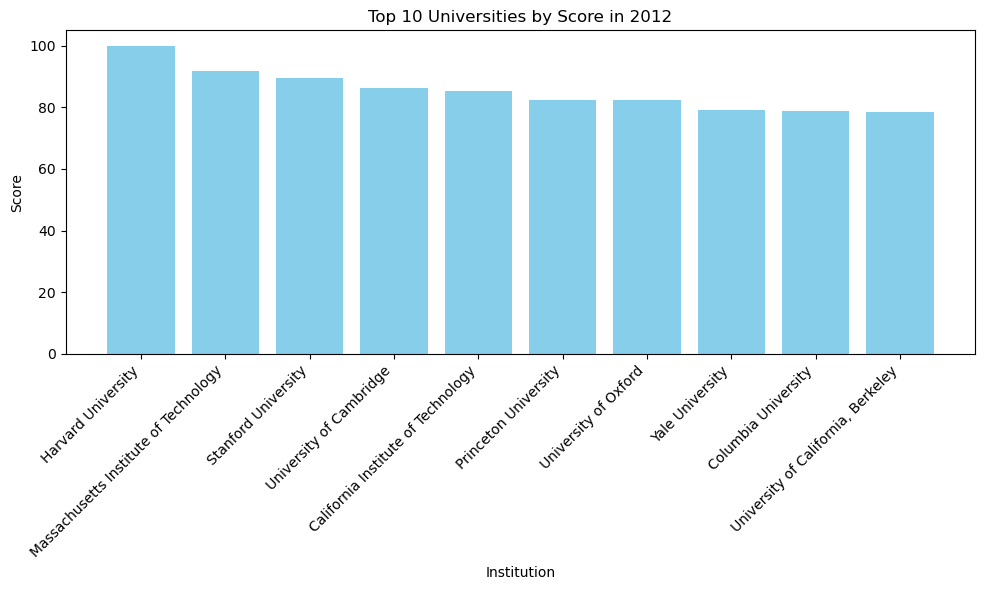

In [108]:
# Task 6 :-
#Questions for Visualizations:-
#1) How can you use matplotlib to create a bar chart showing the top 10 universities by their scores in 2012?

import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named df
# Replace 'year_column', 'institution_column', and 'score_column' with the actual column names in your DataFrame

# Filter data for the year 2012
data_2012 = df[df['year'] == 2012]

# Sort the data by scores in descending order and select the top 10 universities
top_10_universities = data_2012.sort_values(by='score', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_universities['institution'], top_10_universities['score'], color='skyblue')
plt.xlabel('Institution')
plt.ylabel('Score')
plt.title('Top 10 Universities by Score in 2012')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()


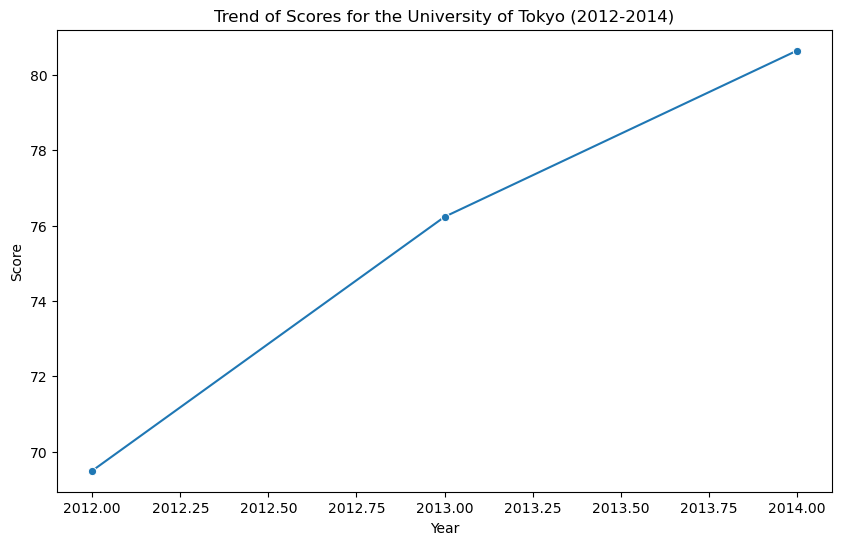

In [110]:
#2) Create a line plot using seaborn to visualize the trend of scores for the University of Tokyo from 2012 to 2014.

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'year_column', 'institution_column', and 'score_column' with the actual column names in your DataFrame

# Filter data for the University of Tokyo and the years 2012 to 2014
data_utokyo = df[(df['institution'] == 'University of Tokyo') & (df['year'].between(2012, 2014))]

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='score', data=data_utokyo, marker='o')
plt.xlabel('Year')
plt.ylabel('Score')
plt.title('Trend of Scores for the University of Tokyo (2012-2014)')

# Show the plot
plt.show()


In [134]:
#3) How can you use Altair to create a scatter plot comparing the quality of faculty and alumni employment for all universities in 2013?


import altair as alt

scatter_chart = alt.Chart(df[df['year'] == 2013]).mark_circle().encode(
    x='quality_of_faculty',
    y='alumni_employment',
    tooltip=['institution', 'quality_of_faculty', 'alumni_employment']
).properties(
    title='Scatter Plot: Quality of Faculty vs. Alumni Employment (2013)'
)

scatter_chart


alt.Chart(...)

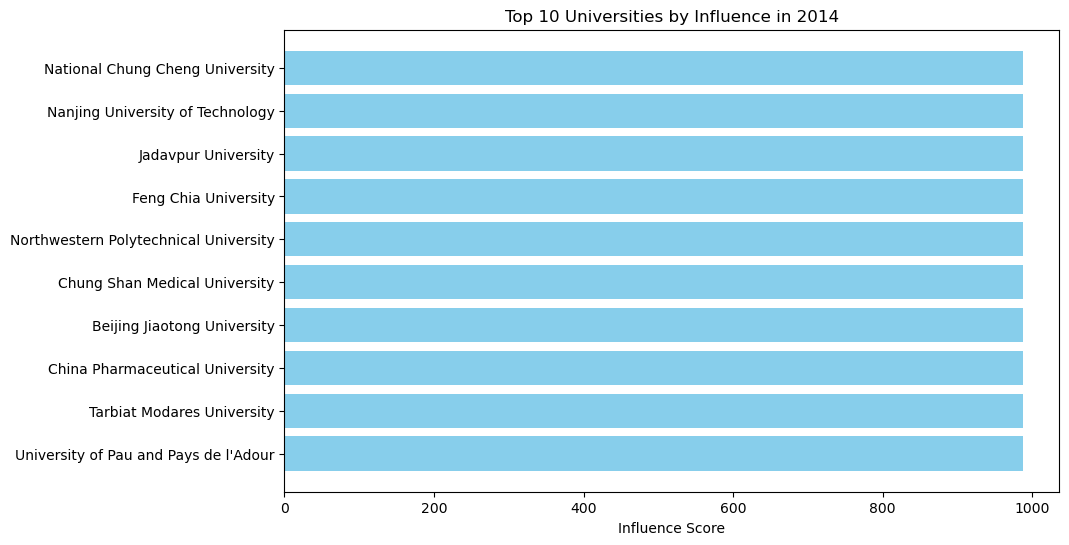

In [133]:
# 4) Using matplotlib, create a horizontal bar chart to display the top 10 universities in terms of influence in 2014.
import matplotlib.pyplot as plt

# Filter the data for the year 2014 and get the top 10 universities by influence
top_10_influence_2014 = df[df['year'] == 2014].nlargest(10, 'influence')

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_influence_2014['institution'], top_10_influence_2014['influence'], color='skyblue')
plt.xlabel('Influence Score')
plt.title('Top 10 Universities by Influence in 2014')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


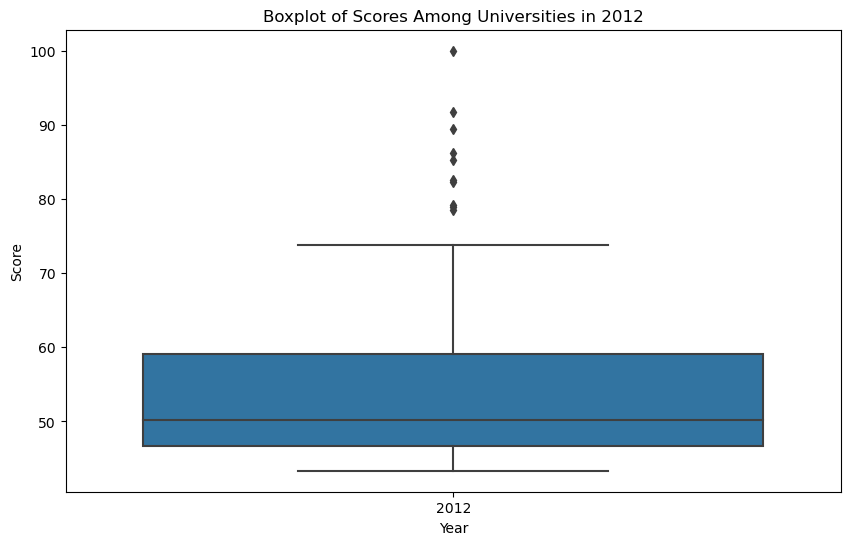

In [116]:
# 5) How can you use seaborn to create a boxplot for the distribution of scores among universities in 2012?
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='score', data=df[df['year'] == 2012])
plt.xlabel('Year')
plt.ylabel('Score')
plt.title('Boxplot of Scores Among Universities in 2012')
plt.show()




In [130]:
#6)Create a stacked area plot using Altair to represent the change in scores for the top 5 universities from 2012 to 2014.
import altair as alt

top_5_scores = df[df['year'].between(2012, 2014)].nlargest(5, 'score')

stacked_area_chart = alt.Chart(top_5_scores).mark_area().encode(
    x='year:N',
    y='score:Q',
    color='institution:N',
    tooltip=['institution', 'score']
).properties(
    title='Stacked Area Plot: Change in Scores for Top 5 Universities (2012-2014)'
)

stacked_area_chart


alt.Chart(...)

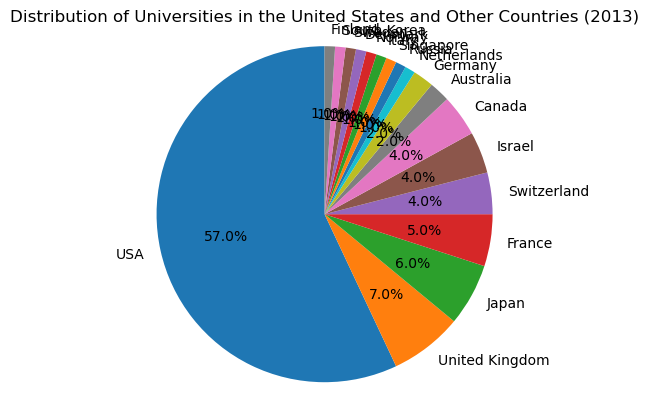

In [131]:
#7)How can you use matplotlib to create a pie chart illustrating the distribution of universities in the United States and other countries in 2013?
import matplotlib.pyplot as plt

us_vs_other_countries = df[df['year'] == 2013]['country'].value_counts()

plt.pie(us_vs_other_countries, labels=us_vs_other_countries.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Universities in the United States and Other Countries (2013)')
plt.show()



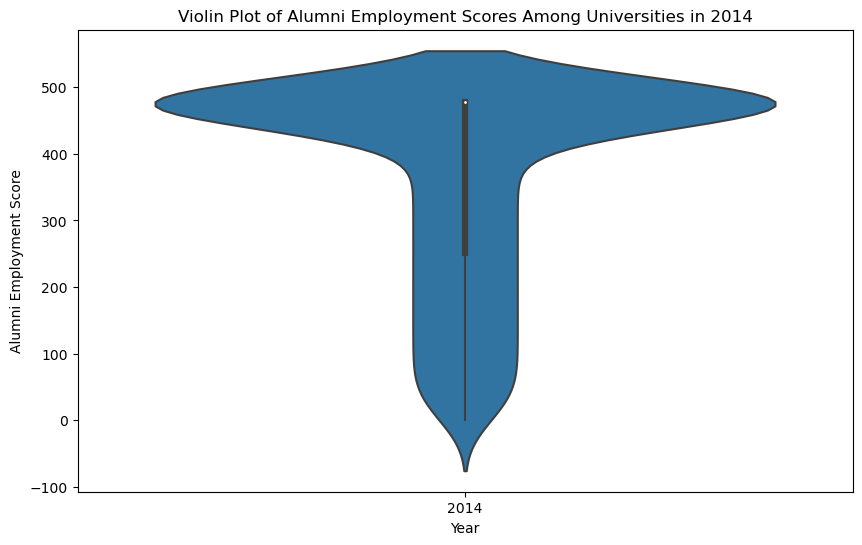

In [132]:
#8)Using seaborn, create a violin plot to show the distribution of alumni employment scores among universities in 2014.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(x='year', y='alumni_employment', data=df[df['year'] == 2014])
plt.xlabel('Year')
plt.ylabel('Alumni Employment Score')
plt.title('Violin Plot of Alumni Employment Scores Among Universities in 2014')
plt.show()


In [136]:
#9)How can you use Altair to create a bar chart for the top 10 universities with the highest scores in 2014?
import altair as alt

# Filter the data for the year 2014 and get the top 10 universities by score
top_10_scores_2014 = df[df['year'] == 2014].nlargest(10, 'score')

# Create a bar chart using Altair
bar_chart = alt.Chart(top_10_scores_2014).mark_bar().encode(
    x='score:Q',
    y=alt.Y('institution:N', sort='-x'),
    color='institution:N'
).properties(
    title='Top 10 Universities with Highest Scores in 2014'
)

bar_chart


alt.Chart(...)

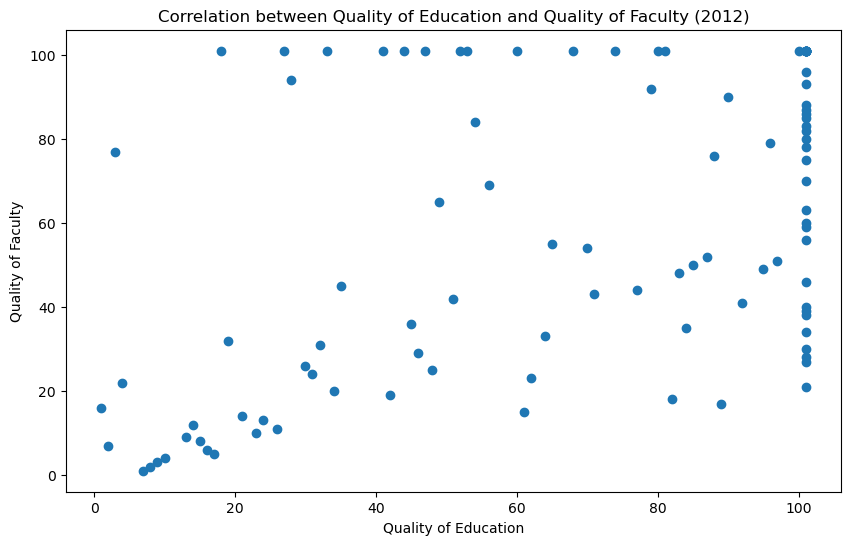

In [137]:
#10)Create a scatter plot using matplotlib to visualize the correlation between the quality of education and the quality of faculty for all universities in 2012.
import matplotlib.pyplot as plt

# Filter the data for the year 2012
data_2012 = df[df['year'] == 2012]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data_2012['quality_of_education'], data_2012['quality_of_faculty'])
plt.xlabel('Quality of Education')
plt.ylabel('Quality of Faculty')
plt.title('Correlation between Quality of Education and Quality of Faculty (2012)')
plt.show()


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\AppData\Local\Temp\ipykernel_16952\548045505.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


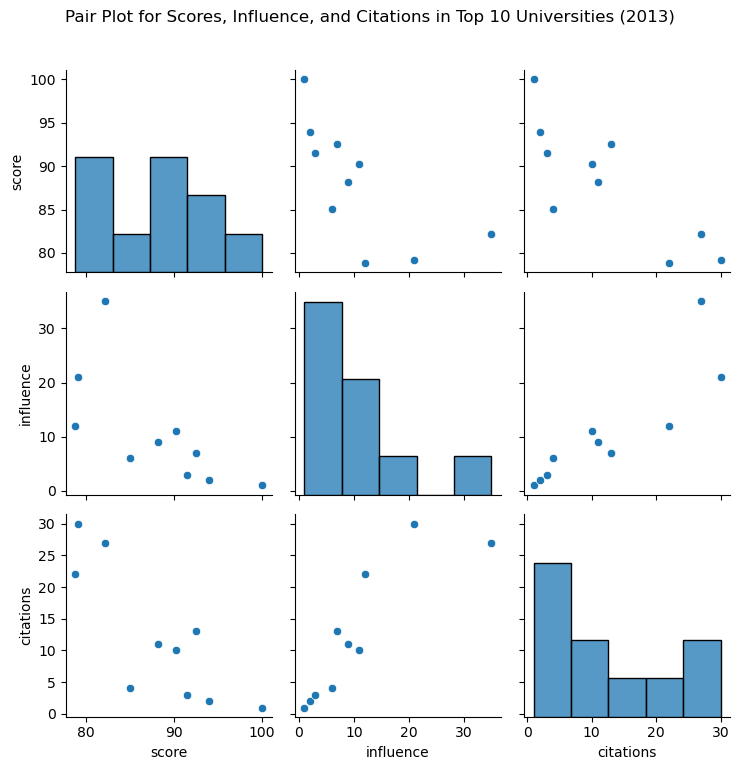

In [142]:
#11)How can you use seaborn to create a pair plot to visualize the relationships between the scores, influence, and citations for the top 10 universities in 2013?
import seaborn as sns

# Filter the data for the year 2013 and get the top 10 universities by score
top_10_scores_2013 = df[df['year'] == 2013].nlargest(10, 'score')

# Create a pair plot using Seaborn
sns.pairplot(top_10_scores_2013[['score', 'influence', 'citations']])
plt.suptitle('Pair Plot for Scores, Influence, and Citations in Top 10 Universities (2013)', y=1.02)
plt.tight_layout()
plt.show()


In [140]:
#12)Using Altair, create a bar chart to compare the scores of universities in the United States and the United Kingdom in 2014.
# Filter the data for the year 2014 and universities in the United States and the United Kingdom
us_uk_scores_2014 = df[(df['year'] == 2014) & (df['country'].isin(['United States', 'United Kingdom']))]

# Create a bar chart using Altair
bar_chart_us_uk = alt.Chart(us_uk_scores_2014).mark_bar().encode(
    x='score:Q',
    y='institution:N',
    color='country:N'
).properties(
    title='Comparison of Scores: US vs UK (2014)'
)

bar_chart_us_uk


alt.Chart(...)

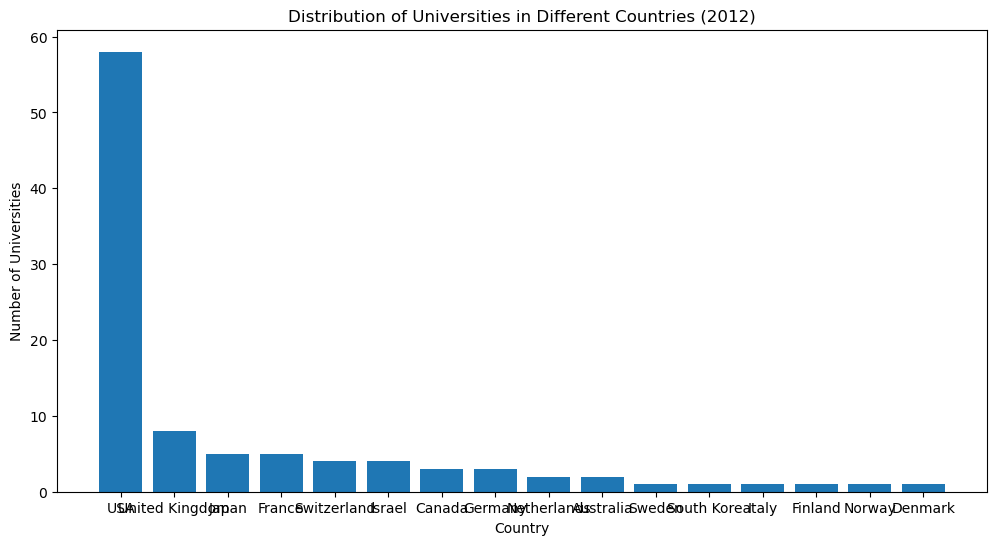

In [141]:
#13)How can you use matplotlib to create a stacked bar chart illustrating the distribution of universities in different countries in 2012?
# Filter the data for the year 2012
data_2012 = df[df['year'] == 2012]

# Create a stacked bar chart using Matplotlib
country_counts = data_2012['country'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(country_counts.index, country_counts.values)
plt.xlabel('Country')
plt.ylabel('Number of Universities')
plt.title('Distribution of Universities in Different Countries (2012)')
plt.show()


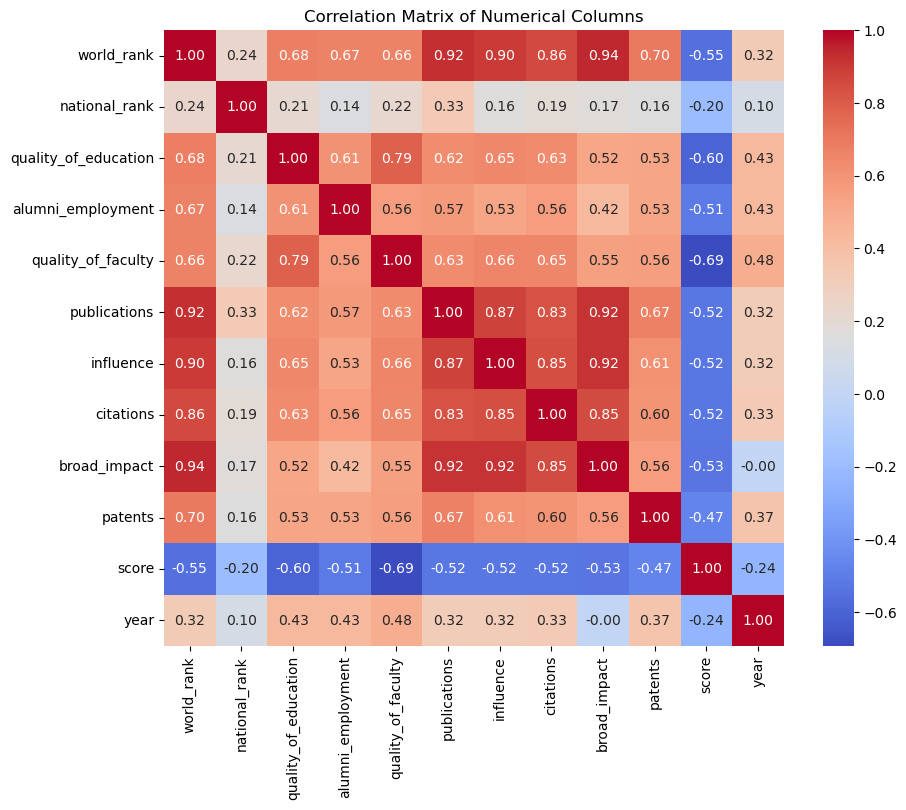

In [143]:
#14)Create a heatmap using seaborn to visualize the correlation matrix of the numerical columns in the dataset.
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for the correlation matrix
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


In [145]:
#15)How can you use Altair to create a line chart showing the trend of scores for the top 5 universities in 2014?
import altair as alt

# Filter the data for the year 2014 and get the top 5 universities by score
top_5_scores_2014 = df[df['year'] == 2014].nlargest(5, 'score')

# Create a line chart using Altair
line_chart = alt.Chart(top_5_scores_2014).mark_line().encode(
    x='institution:N',
    y='score:Q',
    color='institution:N',
    tooltip=['institution', 'score']
).properties(
    title='Line Chart: Trend of Scores for Top 5 Universities (2014)'
)

line_chart


alt.Chart(...)

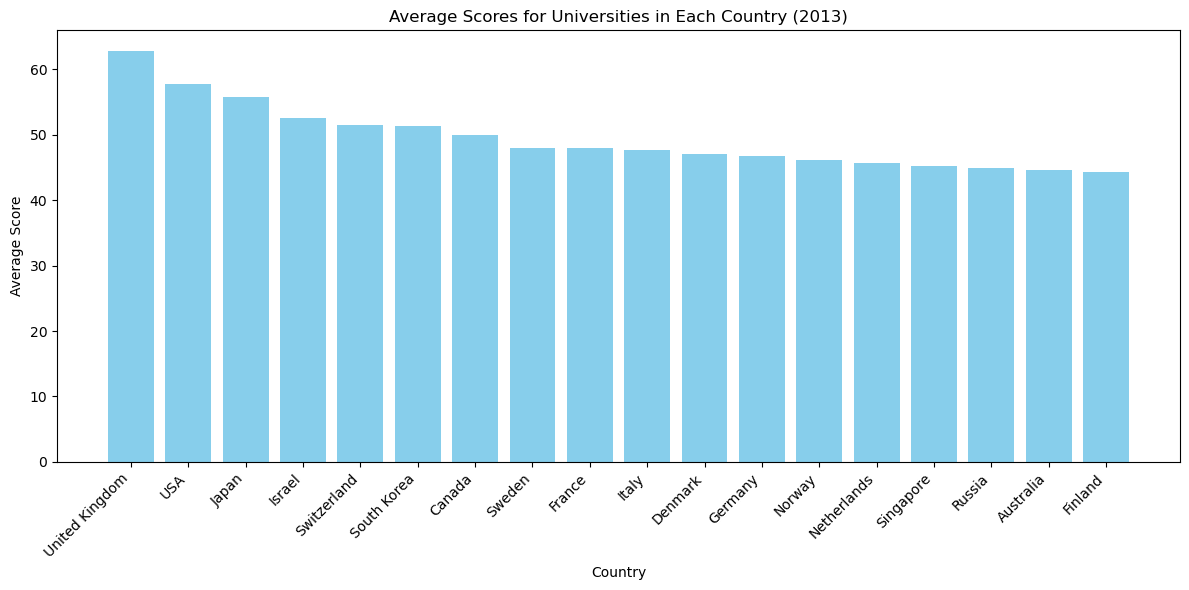

In [173]:
#16)Using matplotlib, create a bar chart to show the average scores for universities in each country in 2013.

import matplotlib.pyplot as plt
import pandas as pd

# Assuming you already have a DataFrame named 'df' with the necessary data

# Filter the data for the year 2013
scores_2013 = df[df['year'] == 2013]

# Calculate average scores for each country
average_scores_by_country = scores_2013.groupby('country')['score'].mean().reset_index()

# Sort the data by average score in descending order
average_scores_by_country = average_scores_by_country.sort_values(by='score', ascending=False)

# Create a bar chart using matplotlib
plt.figure(figsize=(12, 6))
plt.bar(average_scores_by_country['country'], average_scores_by_country['score'], color='skyblue')
plt.title('Average Scores for Universities in Each Country (2013)')
plt.xlabel('Country')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 83.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 78.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 82.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.3% of the points cannot be plac

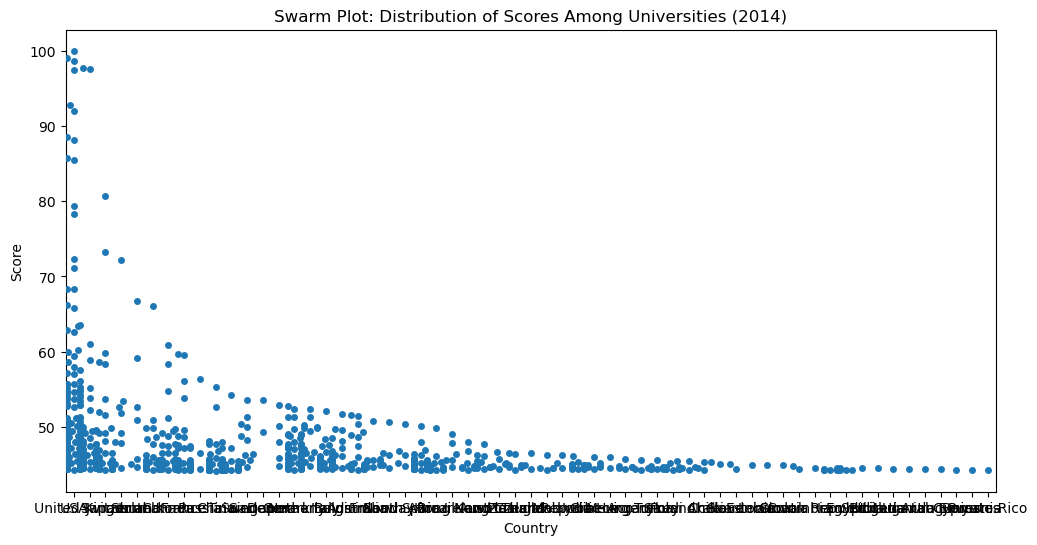

In [161]:
#17)How can you use seaborn to create a swarm plot to visualize the distribution of scores among universities in 2014?
# Filter the data for the year 2014
scores_2014 = df[df['year'] == 2014]

# Create a swarm plot using seaborn
plt.figure(figsize=(12, 6))
sns.swarmplot(x='country', y='score', data=scores_2014, size=2)
plt.title('Swarm Plot: Distribution of Scores Among Universities (2014)')
plt.xlabel('Country')
plt.ylabel('Score')
plt.show()


In [155]:
#18)Create a treemap using Altair to represent the proportion of universities in each country in 2012.
import altair as alt

# Filter the data for the year 2012
universities_2012 = df[df['year'] == 2012]

# Create a treemap using Altair
treemap = alt.Chart(universities_2012).mark_rect().encode(
    color='count():Q',
    tooltip=['country:N', 'count():Q'],
).properties(
    title='Treemap: Proportion of Universities in Each Country (2012)'
)

treemap


alt.Chart(...)

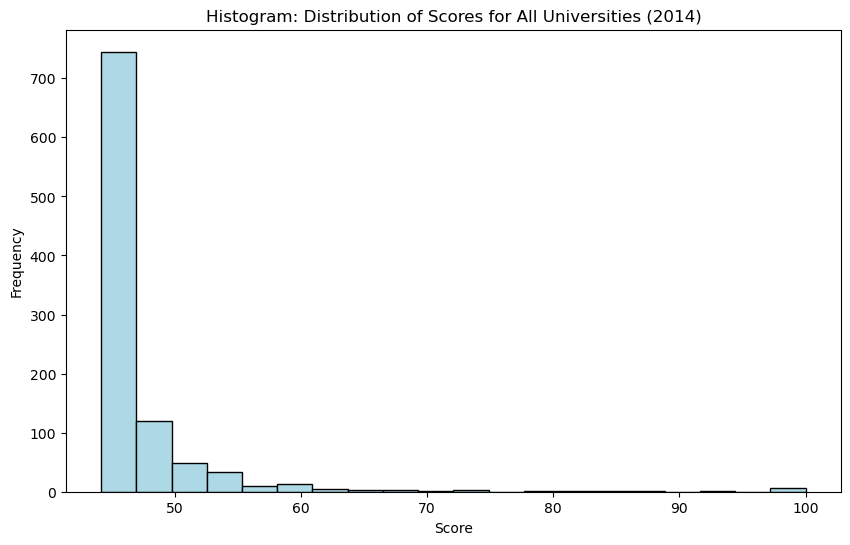

In [151]:
#19)How can you use matplotlib to create a histogram showing the distribution of scores for all universities in 2014?
# Filter the data for the year 2014
scores_2014 = df[df['year'] == 2014]

# Create a histogram using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(scores_2014['score'], bins=20, color='lightblue', edgecolor='black')
plt.title('Histogram: Distribution of Scores for All Universities (2014)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


In [153]:
#20)Using Altair, create a bar chart to compare the influence scores of universities in Canada and Australia in 2013.
import altair as alt

# Filter the data for the year 2013 and universities in Canada and Australia
universities_ca_au_2013 = df[(df['year'] == 2013) & (df['country'].isin(['Canada', 'Australia']))]

# Create a bar chart using Altair
bar_chart = alt.Chart(universities_ca_au_2013).mark_bar().encode(
    x='institution:N',
    y='influence:Q',
    color='country:N',
    tooltip=['institution', 'influence']
).properties(
    title='Bar Chart: Influence Scores of Universities in Canada and Australia (2013)'
)

bar_chart

alt.Chart(...)